In [1]:
#Question 2
get_ipython().system('pip3 install nuscenes-devkit')

Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [2]:
get_ipython().system('pip3 install open3d')
from nuimages import NuImages
from nuscenes.nuscenes import NuScenes
from nuscenes.nuscenes import NuScenesExplorer
import matplotlib.pyplot as plt
from IPython.display import display
from PIL import Image
import open3d as o3d
import numpy as np
from pyquaternion import Quaternion
from nuscenes.utils.data_classes import RadarPointCloud
nuim = NuScenes(dataroot='/data/sets/nuscenes', version='v1.0-mini', verbose=True)
nexp = NuScenesExplorer(nuim)

Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Loading NuScenes tables for version v1.0-mini...
23 category,
8 attribute,
4 visibility,
911 instance,
12 sensor,
120 calibrated_sensor,
31206 ego_pose,
8 log,
10 scene,
404 sample,
31206 sample_data,
18538 sample_annotation,
4 map,
Done loading in 0.288 seconds.
Reverse indexing ...
Done reverse indexing in 0.1 seconds.


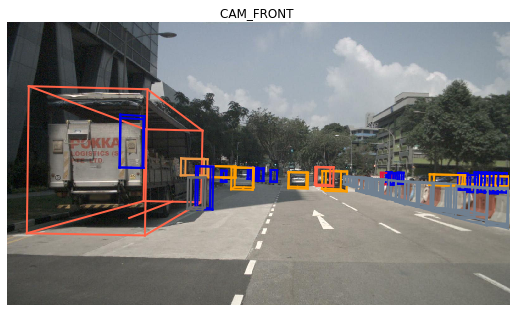

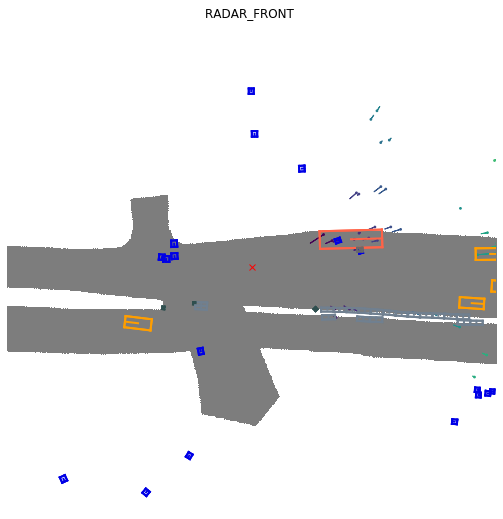

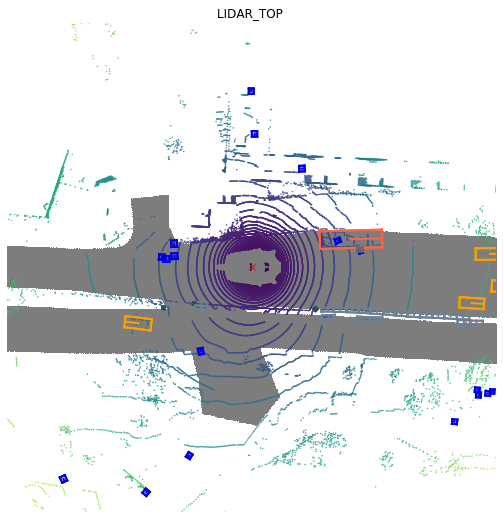

In [3]:
#Question 3
my_scene = nuim.scene[0]
first_sample_token = my_scene['first_sample_token']
my_sample = nuim.get('sample', first_sample_token)
#Visualizing camera data
camera = 'CAM_FRONT'
cam_front_data = nuim.get('sample_data', my_sample['data'][camera])
nuim.render_sample_data(cam_front_data['token'])
#Visualizing radar data
radar = 'RADAR_FRONT'
radar_front_data = nuim.get('sample_data', my_sample['data'][radar])
nuim.render_sample_data(radar_front_data['token'])
#Visualizing lidar data
lidar = 'LIDAR_TOP'
lidar_front_data = nuim.get('sample_data', my_sample['data'][lidar])
nuim.render_sample_data(lidar_front_data['token'])


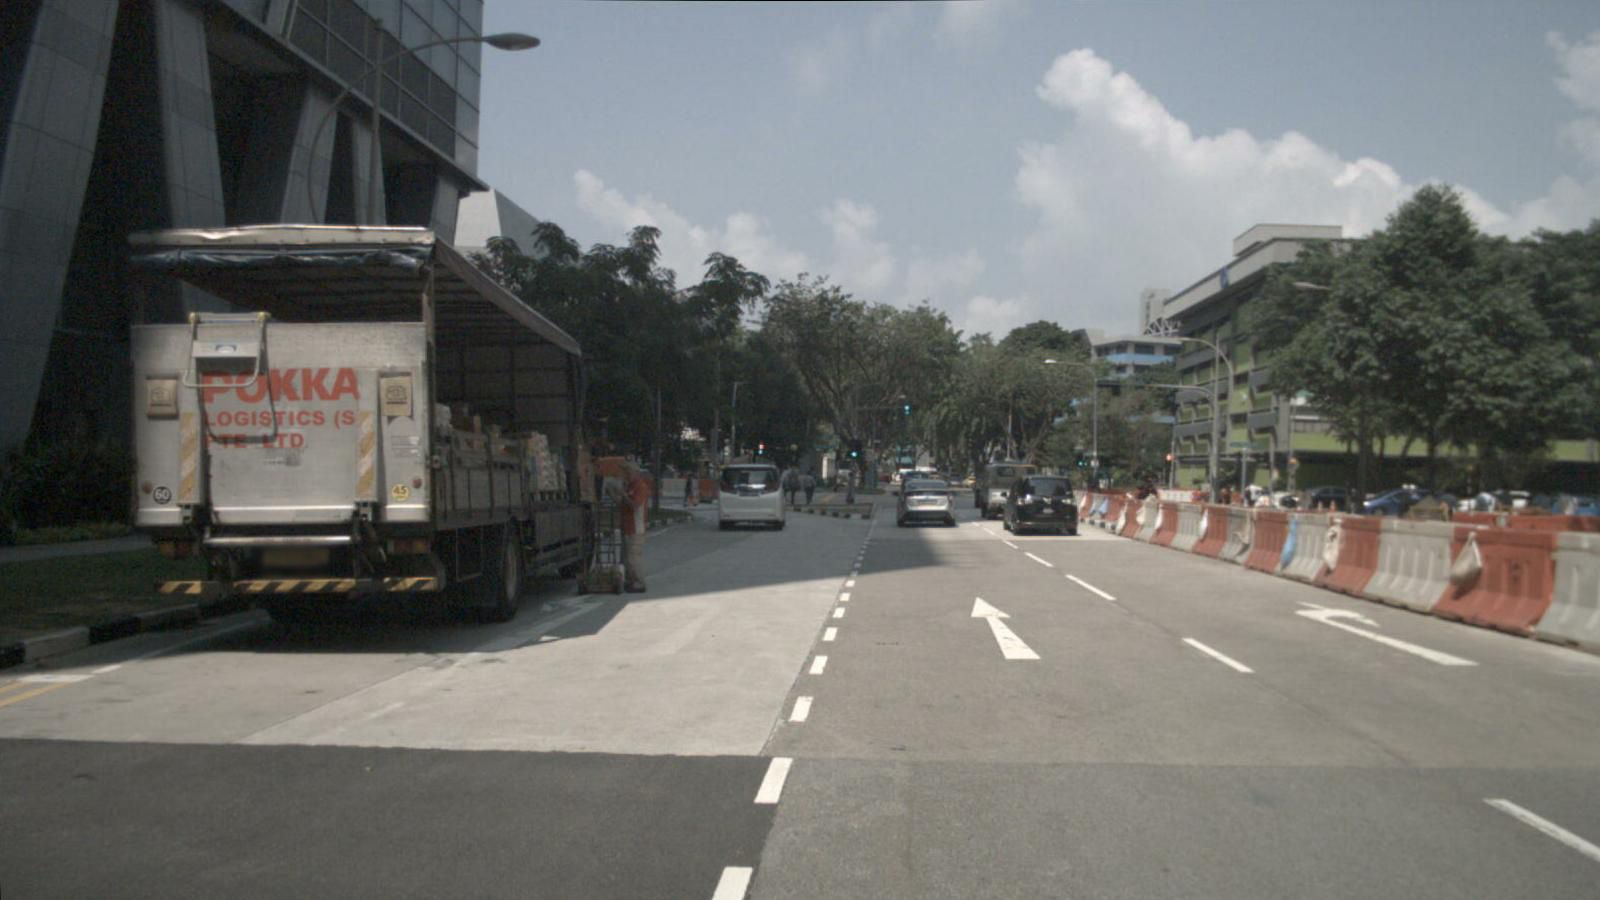

In [4]:
#Question 4
#(1)Visualizing image --Not using Nuscenes methods
path="/data/sets/nuscenes/samples/CAM_FRONT/n015-2018-07-24-11-22-45+0800__CAM_FRONT__1532402927612460.jpg"
display(Image.open(path))

In [10]:
#4.(2).(a)Visualizing lidar data
seg_name='/data/sets/nuscenes/lidarseg/v1.0-mini/4484110755904050a880043268149497_lidarseg.bin'
seg=np.fromfile(seg_name, dtype=np.uint8)
color = np.zeros([len(seg), 3])
pcd_name='/data/sets/nuscenes/samples/LIDAR_TOP/n008-2018-08-28-16-43-51-0400__LIDAR_TOP__1535489296047917.pcd.bin'
scan=np.fromfile(pcd_name, dtype=np.float32)
points = scan.reshape((-1, 5))[:, :4]
color[:, 0] = seg/32
color[:, 1] = seg/32
color[:, 2] = seg/32
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(points[:, :3])
pcd.colors = o3d.utility.Vector3dVector(color)
o3d.visualization.draw_geometries([pcd])

[Open3D WARNING] GLFW Error: GLX: Failed to create context: BadValue (integer parameter out of range for operation)
[Open3D WARNING] Failed to create window
[Open3D WARNING] [DrawGeometries] Failed creating OpenGL window.


In [6]:
#4.2.(b)Colorizing Lidar PCD by height, intensity and semantic label respectively --CHANGED
pcd_name='/data/sets/nuscenes/samples/LIDAR_TOP/n008-2018-08-28-16-43-51-0400__LIDAR_TOP__1535489296047917.pcd.bin'
scan=np.fromfile(pcd_name, dtype=np.float32)
points = scan.reshape((-1, 5))[:, :4]
height = points[:,2]
intensity = points[:,3]
color[:, 0] = height/32
color[:, 1] = 0.5
color[:, 2] = 0.5
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(points[:, :3])
pcd.colors = o3d.utility.Vector3dVector(color)
o3d.visualization.draw_geometries([pcd])
color[:, 0] = intensity/32
color[:, 1] = 0.5
color[:, 2] = 0.5
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(points[:, :3])
pcd.colors = o3d.utility.Vector3dVector(color)
o3d.visualization.draw_geometries([pcd])
color[:, 0] = seg/32
color[:, 1] = 0.5
color[:, 2] = 0.5
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(points[:, :3])
pcd.colors = o3d.utility.Vector3dVector(color)
o3d.visualization.draw_geometries([pcd])



[Open3D WARNING] GLFW Error: GLX: Failed to create context: BadValue (integer parameter out of range for operation)
[Open3D WARNING] Failed to create window
[Open3D WARNING] [DrawGeometries] Failed creating OpenGL window.
[Open3D WARNING] GLFW Error: GLX: Failed to create context: BadValue (integer parameter out of range for operation)
[Open3D WARNING] Failed to create window
[Open3D WARNING] [DrawGeometries] Failed creating OpenGL window.
[Open3D WARNING] GLFW Error: GLX: Failed to create context: BadValue (integer parameter out of range for operation)
[Open3D WARNING] Failed to create window
[Open3D WARNING] [DrawGeometries] Failed creating OpenGL window.


In [7]:
#4.3.(a)Visualizing radar data
radar_pcd_name='/data/sets/nuscenes/samples/RADAR_FRONT/n015-2018-07-24-11-22-45+0800__RADAR_FRONT__1532402927664178.pcd'
radar_scan = np.fromfile(radar_pcd_name, dtype=np.float32)
radar_obj = RadarPointCloud.from_file(radar_pcd_name)
radar_points = radar_obj.points
radar_points = radar_obj.points.T
color_radar = np.zeros([len(radar_points), 3])
pcd.points = o3d.utility.Vector3dVector(radar_points[:, :3])
color_radar[:, 0] = radar_points[:,0]/32
color_radar[:, 1] = radar_points[:,1]/32
pcd.colors = o3d.utility.Vector3dVector(color_radar)
o3d.visualization.draw_geometries([pcd])


[Open3D WARNING] GLFW Error: GLX: Failed to create context: BadValue (integer parameter out of range for operation)
[Open3D WARNING] Failed to create window
[Open3D WARNING] [DrawGeometries] Failed creating OpenGL window.


In [8]:
#4.3.(b)Colorizing points by height and velocity
height_radar =  radar_points[:,2]
vel = radar_points[:,6]
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(radar_points[:, :3])
color_radar[:, 0] = height_radar/32
color_radar[:, 1] = vel/32
pcd.colors = o3d.utility.Vector3dVector(color_radar)
o3d.visualization.draw_geometries([pcd])

[Open3D WARNING] GLFW Error: GLX: Failed to create context: BadValue (integer parameter out of range for operation)
[Open3D WARNING] Failed to create window
[Open3D WARNING] [DrawGeometries] Failed creating OpenGL window.


(-0.5, 1599.5, 899.5, -0.5)

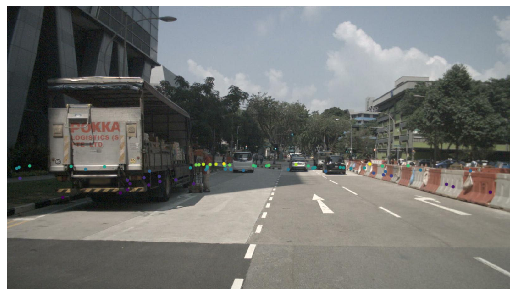

In [9]:
#5.(1)Visualize radar data projection on image
radar_points, radar_coloring, radar_image = nexp.map_pointcloud_to_image(radar_front_data['token'],cam_front_data['token'])
plt.figure(figsize=(9, 16))
plt.imshow(radar_image)
plt.scatter(radar_points[0, :], radar_points[1, :], c=radar_coloring, s=5)
plt.axis('off')
